<a href="https://colab.research.google.com/github/rcarbon-del/CCS8-Colab/blob/main/L3_Carbonel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARBONEL, RADGE DARYLL A.
CC19 - 2C

# **Intialization**

**STEP 1:** Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

**STEP 2:** Importing Dataset

In [2]:
df_hotels = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')
df_hotels = df_hotels.reset_index().rename(columns={'index':'id'})

# **QUESTION 1:** Create a function with one argument formed in DataFrame to check the data type, the number of null values, the percentage of null values and the number of unique values for each column!

**Step 1:** Creating the check_values function

In [3]:
def check_values(df):
    data = []
    for column in df.columns:
      data.append([
                  column, \
                  df[column].dtype, \
                  df[column].isna().sum(), \
                  round(100*(df[column].isna().sum()/len(df)),2), \
                  df[column].nunique()
                  ])
    return pd.DataFrame(columns=['Data_Features','Data_Type','Null','Null_Percentage','Unique_Value'], data=data)

**Step 2:** Running the check_values function

In [4]:
check_values(df_hotels)

,Data_Features,Data_Type,Null,Null_Percentage,Unique_Value
0,id,int64,0,0.00,119390
1,hotel,object,0,0.00,2
2,is_canceled,int64,0,0.00,2
3,lead_time,int64,0,0.00,479
4,arrival_date_year,int64,0,0.00,3
5,arrival_date_month,object,0,0.00,12
6,arrival_date_week_number,int64,0,0.00,53
7,arrival_date_day_of_month,int64,0,0.00,31
8,stays_in_weekend_nights,int64,0,0.00,17
9,stays_in_week_nights,int64,0,0.00,35


# **Question 2:** How many visitors are there who cancel the reservation and who don’t? And from that number draw conclusions about the proportions of each!

**STEP 1:** Checking cancellations using value_counts, normalization, and box plots

In [5]:
df_hotels.is_canceled.value_counts()
print("Table of Cancellation Count")
print(df_hotels.is_canceled.value_counts())
print()
print("Number of cancellations: ", df_hotels.is_canceled.value_counts()[1])
print("Number of non-cancellations: ", df_hotels.is_canceled.value_counts()[0])
print()

Table of Cancellation Count
is_canceled
0    75166
1    44224
Name: count, dtype: int64

Number of cancellations:  44224
Number of non-cancellations:  75166



**STEP 2:** Checking cancellations using normalization

In [6]:
df_hotels.is_canceled.value_counts(normalize=True)
print("Table of Cancellation Percentage")
print(df_hotels.is_canceled.value_counts(normalize=True))
print()
print("Percentage of cancellations: ", (df_hotels.is_canceled.value_counts(normalize=True)[1]*100))
print("Percentage of non-cancellations: ", (df_hotels.is_canceled.value_counts(normalize=True)[0]*100))
print()

Table of Cancellation Percentage
is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

Percentage of cancellations:  37.041628277075134
Percentage of non-cancellations:  62.958371722924866



**STEP 3:** Visually checking cancellations using box plots

# **Question 3:**
*   For “City Hotel”, what is the percentage of canceled reservations?
*   For “Resort Hotel”, what is the percentage of canceled reservations?
*   What type of hotel that has the bigger percentage of canceled reservations?



**A)** For “City Hotel”, what is the percentage of canceled reservations?


In [7]:
cityHotelPercentage = len(df_hotels[(df_hotels.hotel=='City Hotel')&(df_hotels.is_canceled==1)])/len(df_hotels[df_hotels.hotel=='City Hotel'])
print("Percentage of City Hotel Cancelled Reservations:", round((cityHotelPercentage*100),2), "%")

Percentage of City Hotel Cancelled Reservations: 41.73 %


**B)** For “Resort Hotel”, what is the percentage of canceled reservations?


In [8]:
resortHotelPercentage = len(df_hotels[(df_hotels.hotel=='Resort Hotel')&(df_hotels.is_canceled==1)])/len(df_hotels[df_hotels.hotel=='City Hotel'])
print("Percentage of Resort Hotel Cancelled Reservations:", round((resortHotelPercentage*100),2), "%")

Percentage of Resort Hotel Cancelled Reservations: 14.02 %


**C)** What type of hotel that has the bigger percentage of canceled reservations?

In [9]:
print("Percentage of City Hotel Cancelled Reservations:", round((cityHotelPercentage*100),2), "%")
print("Percentage of Resort Hotel Cancelled Reservations:", round((resortHotelPercentage*100),2), "%")
print()
if cityHotelPercentage > resortHotelPercentage:
  print("City Hotel has the bigger percentage of canceled reservations.")
else:
  print("Resort Hotel has the bigger percentage of canceled reservations.")
#

Percentage of City Hotel Cancelled Reservations: 41.73 %
Percentage of Resort Hotel Cancelled Reservations: 14.02 %

City Hotel has the bigger percentage of canceled reservations.


# **Question 4:** Filter data so that it only displays the visitors who don’t cancel the reservation and save the result in df_checkout variable!

In [ ]:
df_checkout = df_hotels[df_hotels.is_canceled==0]

# **Question 5:**

*   Show the number of reservations per month of arrival for each type of hotel!
*   Then in which month there are the most reservations in each type of hotel? Make a conclusion whether the trend is the same in both types of hotels?
*   Do as point B but with the name of the month that has been mapped into months in numbers!



**A)** Show the number of reservations per month of arrival for each type of hotel!

In [ ]:
df_checkout.groupby(['hotel','arrival_date_month'])['id'].nunique()

hotel         arrival_date_month
City Hotel    April                 4015
              August                5381
              December              2392
              February              3064
              January               2254
              July                  4782
              June                  4366
              March                 4072
              May                   4579
              November              2696
              October               4337
              September             4290
Resort Hotel  April                 2550
              August                3257
              December              2017
              February              2308
              January               1868
              July                  3137
              June                  2038
              March                 2573
              May                   2535
              November              1976
              October               2577
              September             2102
Name: id, dtype: int64

**B)** Then in which month there are the most reservations in each type of hotel? Make a conclusion whether the trend is the same in both types of hotels?

At City Hotel, the most number of reservations was in August with 5381. At Resort Hotel, the most number of reservations was also in August with 3257.
Moreover, it seems that both hotels follow the same trend as they both increase and decrease at the same months.

**C)** Do as point B but with the name of the month that has been mapped into months in numbers!


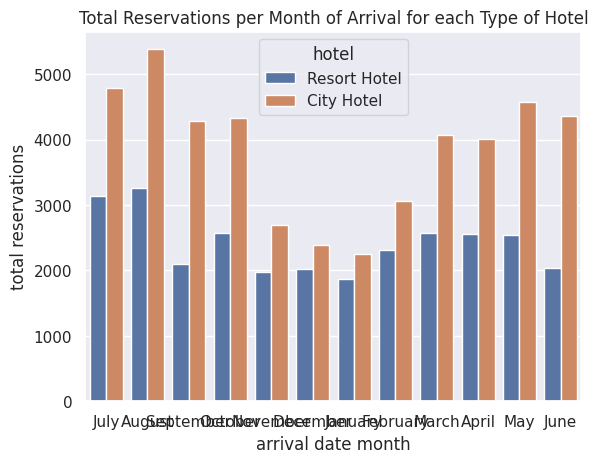

In [ ]:
import calendar

sns.countplot(data=df_checkout, x='arrival_date_month',hue='hotel')
plt.xlabel('arrival date month')
plt.ylabel('total reservations')
plt.title('Total Reservations per Month of Arrival for each Type of Hotel')
plt.show()

# **Question 6:**

*   Create a new column named arrival_date which contains complete information about the year, month, and date of arrival!
*   Change the column to datetime type!




a) Create a new column named arrival_date which contains complete information about the year, month, and date of arrival!

In [ ]:
df_checkout['arrival_date'] = \
  df_checkout['arrival_date_year'].astype('str') + '-' +\
  df_checkout.arrival_date_month.astype('str').str.pad(2,fillchar='0') + '-' +\
  df_checkout.arrival_date_day_of_month.astype('str').str.pad(2,fillchar='0')

df_checkout['arrival_date']

<ipython-input-40-32fcb16a861c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = \


,arrival_date
0,2015-July-01
1,2015-July-01
2,2015-July-01
3,2015-July-01
4,2015-July-01
...,...
119385,2017-August-30
119386,2017-August-31
119387,2017-August-31
119388,2017-August-31


b) Change the column to datetime type!

In [ ]:
df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)
df_checkout['arrival_date']

<ipython-input-44-d3e0ab67e8ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)


,arrival_date
0,2015-07-01
1,2015-07-01
2,2015-07-01
3,2015-07-01
4,2015-07-01
...,...
119385,2017-08-30
119386,2017-08-31
119387,2017-08-31
119388,2017-08-31


# **Question 7:**

Create two dataframe containing:

a) Daily reservation (df_daily_reservation)

b) Average of daily reservation per week (df_avg_daily_reservation_per_week)

a) Daily reservation (df_daily_reservation)

In [ ]:
df_daily_reservation = df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0:'daily_reservation'})
df_daily_reservation

,arrival_date,daily_reservation
0,2015-07-01,103
1,2015-07-02,36
2,2015-07-03,37
3,2015-07-04,45
4,2015-07-05,37
...,...,...
788,2017-08-27,125
789,2017-08-28,147
790,2017-08-29,81
791,2017-08-30,62


b) Average of daily reservation per week (df_avg_daily_reservation_per_week)

In [ ]:
df_avg_daily_reservation_per_week = round(df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0:'avg_daily_reservation_per_week'}).resample('W', on='arrival_date')['avg_daily_reservation_per_week'].mean().reset_index(),2)
df_avg_daily_reservation_per_week

,arrival_date,avg_daily_reservation_per_week
0,2015-07-05,51.60
1,2015-07-12,40.57
2,2015-07-19,53.86
3,2015-07-26,53.00
4,2015-08-02,47.14
...,...,...
109,2017-08-06,101.00
110,2017-08-13,98.00
111,2017-08-20,103.71
112,2017-08-27,103.14


# **Question 8:**
a) What is the average ADR (Average Daily Rate) based on hotel type and customer type?

b) Which type of customer has the highest the average of ADR in each type of hotel?

a) What is the average ADR (Average Daily Rate) based on hotel type and customer type?

In [ ]:
round(df_checkout.groupby(['hotel','customer_type'])['adr'].mean(),2)

hotel         customer_type  
City Hotel    Contract           108.93
              Group               87.40
              Transient          110.42
              Transient-Party     93.71
Resort Hotel  Contract            78.58
              Group               77.31
              Transient           96.00
              Transient-Party     77.20
Name: adr, dtype: float64

b) Which type of customer has the highest the average of ADR in each type of hotel?

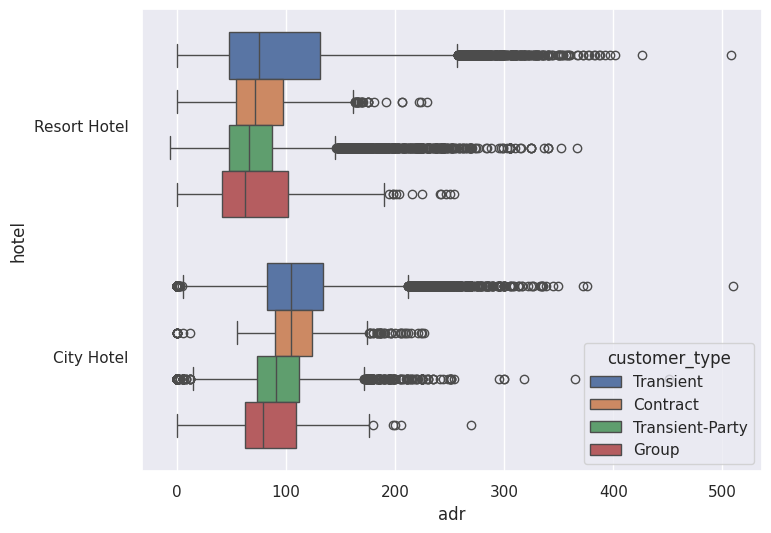

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_checkout, x='adr', y='hotel',hue='customer_type')
plt.show()

The customer-type, Transient, has the highest ADR in each type of hotel.

# **Question 9:**
By using the ‘df_country’ dataframe which contains the country name and country code information, show the 10 countries with the largest number of reservations!

In [ ]:
df_country = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')
df_country['code'] = df_country['Alpha-3 code'].str.replace('"','').str.strip()

df_merged = pd.merge(df_checkout[['id','country']],
                     df_country[['Country','code']],
                     left_on='country',
                     right_on='code',
                     indicator=True,
                     how='left')
df_merged

,id,country,Country,code,_merge
0,0,PRT,Portugal,PRT,both
1,1,PRT,Portugal,PRT,both
2,2,GBR,United Kingdom,GBR,both
3,3,GBR,United Kingdom,GBR,both
4,4,GBR,United Kingdom,GBR,both
...,...,...,...,...,...
75712,119385,BEL,Belgium,BEL,both
75713,119386,FRA,France,FRA,both
75714,119387,DEU,Germany,DEU,both
75715,119388,GBR,United Kingdom,GBR,both


In [ ]:
df_merged.Country.value_counts().head(10)

,count
Country,
Portugal,21071
United Kingdom,9676
France,8481
Spain,6391
Germany,6069
Ireland,2543
Italy,2433
Belgium,1868
Netherlands,1717


In [ ]:
df_merged.Country.value_counts().head(10).sort_values(ascending=True).plot.barh()
plt.xlabel('total reservation')
plt.ylabel('country')
plt.title('10 Countries with the Largest Number of Reservations')
plt.show()

# **Question 10:**
a) How many average guests stay for each reservation?

b) Based on the dataset, what is the highest number of guests? Also show the reservation data row that has the highest number of guests.

a) How many average guests stay for each reservation?


In [ ]:
df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies
round(df_checkout.total_guest.mean(),0)

<ipython-input-51-68f7a87cfde2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies


2.0

b) Based on the dataset, what is the highest number of guests? Also show the reservation data row that has the highest number of guests.

In [ ]:
df_checkout.total_guest.max()
df_checkout[df_checkout.total_guest==df_checkout.total_guest.max()].T

,46619
id,46619
hotel,City Hotel
is_canceled,0
lead_time,37
arrival_date_year,2016
arrival_date_month,January
arrival_date_week_number,3
arrival_date_day_of_month,12
stays_in_weekend_nights,0
stays_in_week_nights,2
